### General

Code setup:

In [1]:
set.seed(30027)
X = rnorm(100, 5, 2)
N = length(X)
x.bar = mean(X)

### Question 1b)
- Code for the Gibbs Sampler:

In [2]:
gibbs.sample = function(mu0, tau0, niter=500) {  
    # columns = mu, tau
    params = matrix(nrow = niter, ncol = 2) 
    # initialize values
    params[1,] = c(mu0, tau0) 
    
    for (t in 2:niter) {
        # the current parameters
        mu0 = params[t-1, 1]
        tau0 = params[t-1, 2]
        
        # the new parameters after resampling
        mu1 = rnorm(1, x.bar, sd=1/sqrt(N*tau0))
        tau1 = rgamma(1, shape=N/2, rate=(sum((X - mu1)^2))/2)
        params[t,] = c(mu1, tau1)
    }
    
    return(params)
}

- Two chains with different initial starting values:

In [3]:
run1 = gibbs.sample(mu=5, tau=0.5)
run2 = gibbs.sample(mu=2, tau=3)

- Trace Plot for both chains (1st chain is red, 2nd chain is blue)
- QQ-Plot for both chains

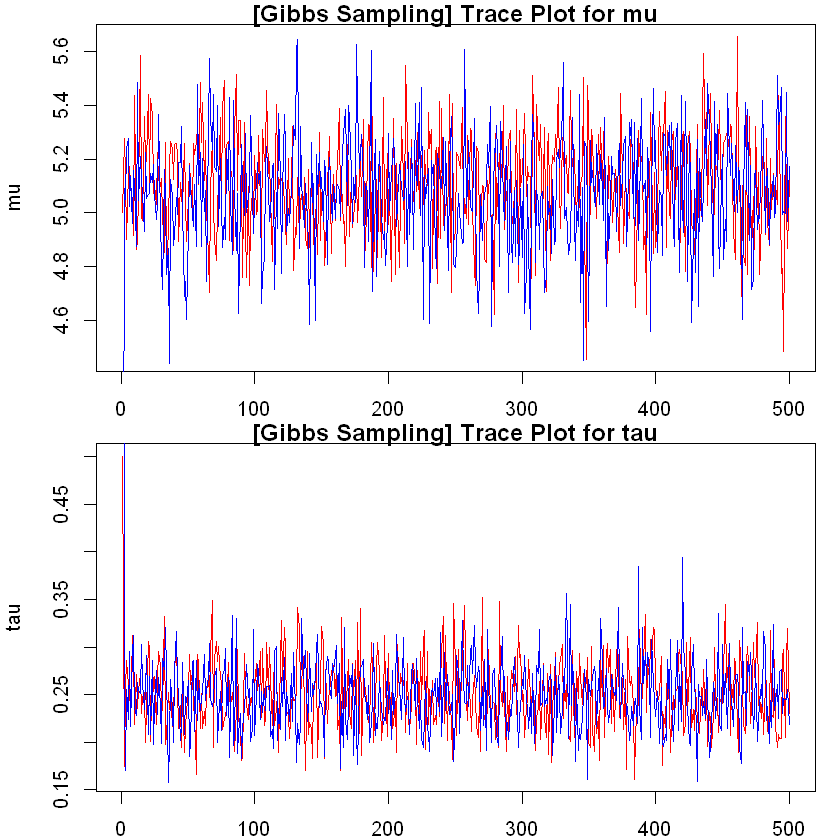

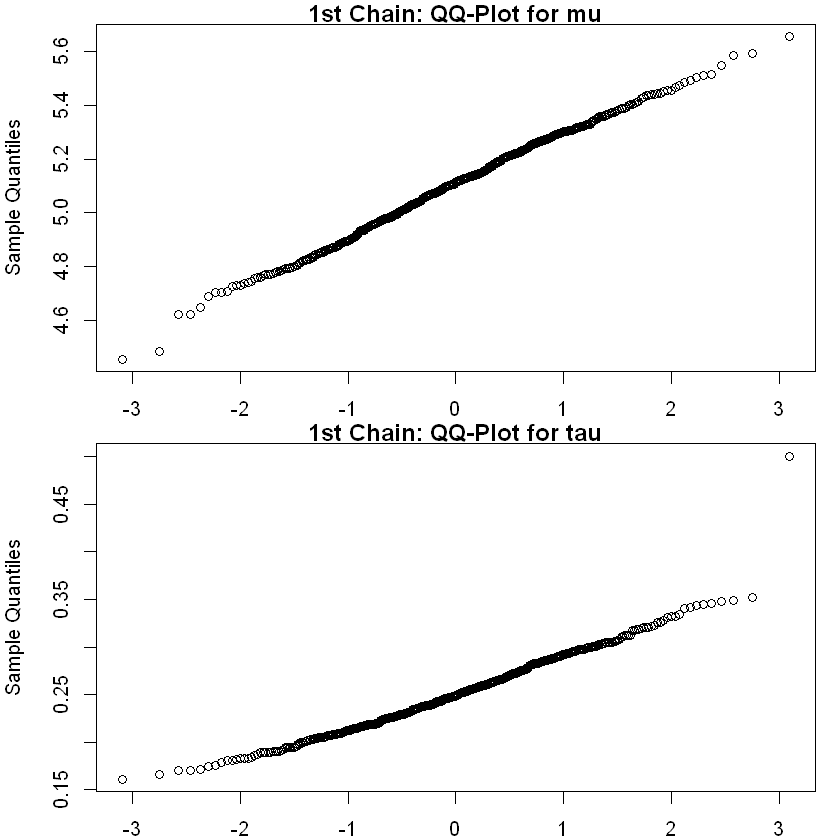

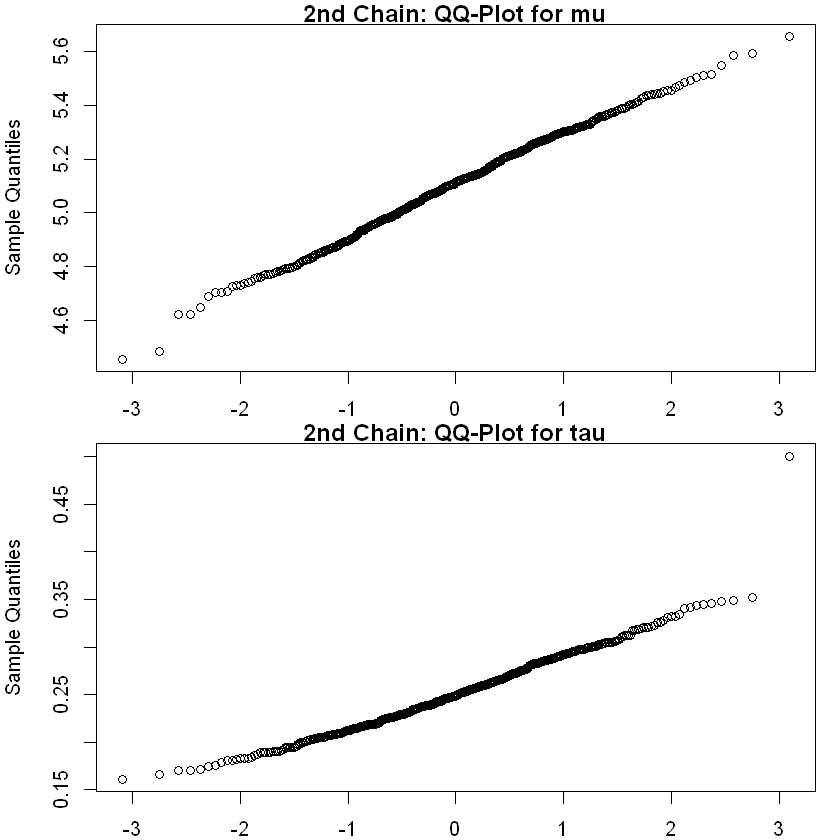

In [4]:
par(mfrow=c(2,1), mar=c(2,4,1,1))
plot(run1[,1], type="l", xlab="iteration", ylab="mu", col="red", main="[Gibbs Sampling] Trace Plot for mu")
lines(run2[,1], col="blue")

plot(run1[,2], type="l", xlab="iteration", ylab="tau", col="red", main="[Gibbs Sampling] Trace Plot for tau")
lines(run2[,2], col="blue")

qqnorm(run1[,1], main="1st Chain: QQ-Plot for mu")
qqnorm(run1[,2], main="1st Chain: QQ-Plot for tau")
qqnorm(run1[,1], main="2nd Chain: QQ-Plot for mu")
qqnorm(run1[,2], main="2nd Chain: QQ-Plot for tau")

### Question 1c)
- Function to output estimated mean, a 90% Credible Interval and histogram plot of estimated distribution

In [5]:
part.c = function(data, param.name="NONE") {
    # Histogram
    hist(data, main=param.name)
    print(c("The mean is:"))
    # Estimated Mean
    print(mean(data))
    print(c("The 90% Credible Interval is"))
    # 5th and 90th quantile
    print(quantile(data, probs=seq(0, 1, 0.05))[c(2,19)])
}

[1] "The mean is:"
[1] 5.104502
[1] "The 90% Credible Interval is"
      5%      90% 
4.782497 5.341995 


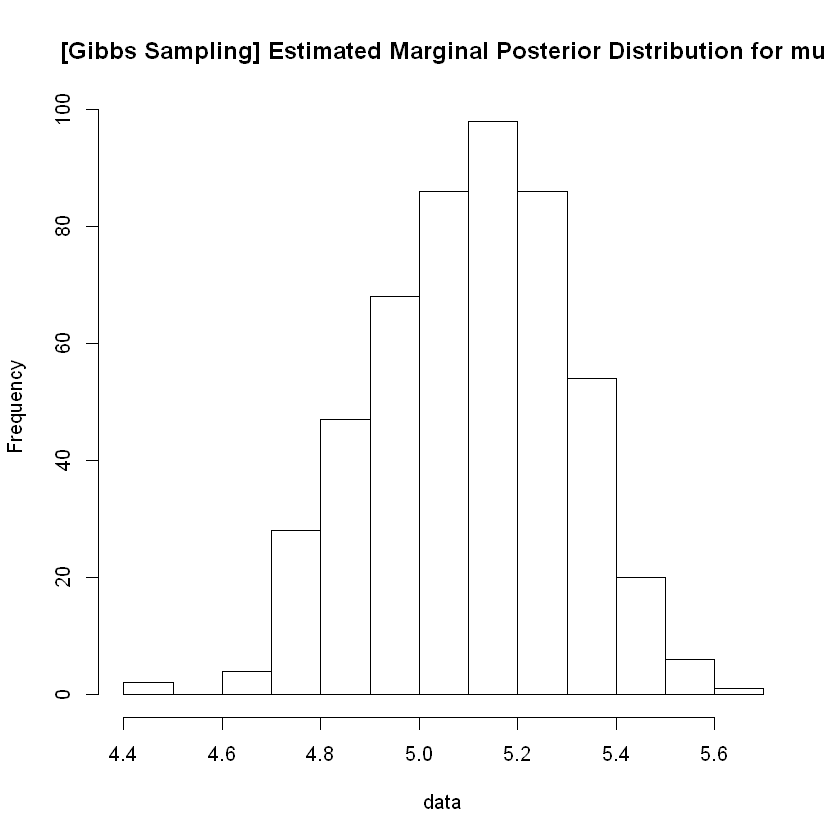

[1] "The mean is:"
[1] 0.251488
[1] "The 90% Credible Interval is"
       5%       90% 
0.1903570 0.3007045 


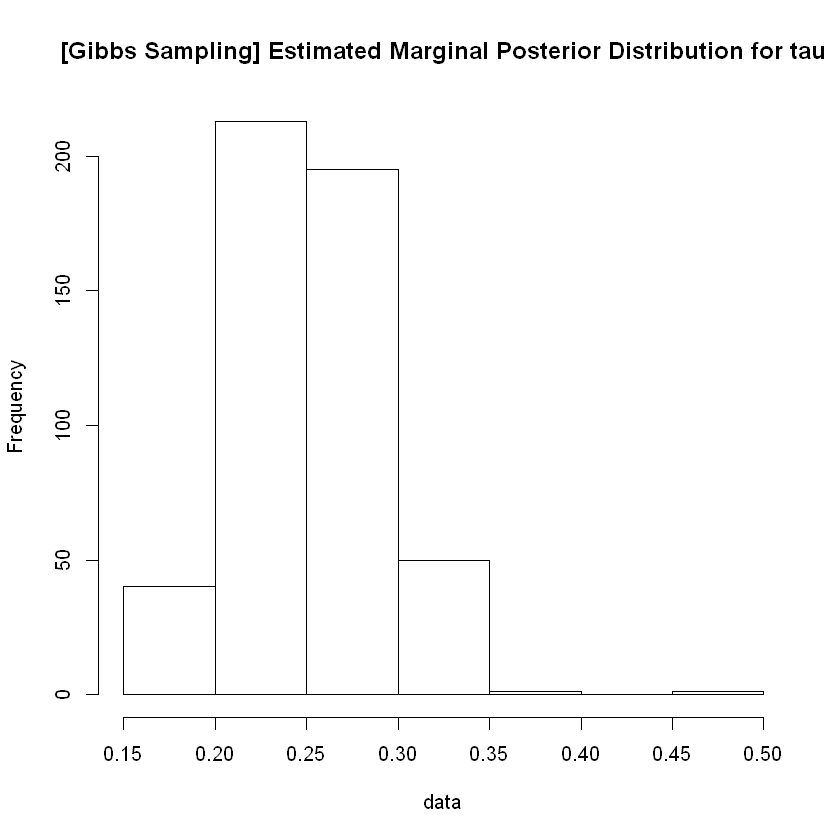

In [6]:
part.c(run1[,1], "[Gibbs Sampling] Estimated Marginal Posterior Distribution for mu")
part.c(run1[,2], "[Gibbs Sampling] Estimated Marginal Posterior Distribution for tau")

### Question 2a)
- Code for the MH-Algorithm

In [7]:
# Proposal function as given
proposal.func = function(mu.c, tau.c) {
    tau.n = rgamma(1, shape=5 * tau.c, rate=5)
    mu.n = rnorm(1, mu.c, tau.n)

    return (c(mu.n, tau.n))
}

# The log transition density probability from a given theta to theta.dash (and vice-versa)
transition = function(theta, theta.dash) {
    prob1 = dgamma(theta.dash, shape=5 * theta, rate=5)
    prob2 = dnorm(theta.dash, theta)
    return (log(prob1) + log(prob2))
}

# The joint distribution with a log transformation to prevent underflow in R
joint = function(mu, tau) {
    return( (N/2 - 1)*log(tau) + (-tau * sum((X - mu)^2)/2) )
}

# Metropolis-Hastings algorithm
mh.sample = function(mu0=0, tau0=0, niter=10000) {
    # columns = mu, tau
    params = matrix(nrow = niter, ncol = 2) 
    # initialize values
    params[1,] = c(mu0, tau0) 

    for (i in 2:niter) {
        # theta
        mu0 = params[i-1,1]
        tau0 = params[i-1,2]
        
        # proposed theta.dash values
        proposal = proposal.func(mu0, tau0)
        mu1 = proposal[1]
        tau1 = proposal[2]
        
        # posterior = log(likelihood) + log(prior)
        pi = joint(mu0, tau0)
        pi.dash = joint(mu1, tau1)
        
        # transition probability between theta -> theta.dash and theta.dash -> theta
        q.dash = transition(tau0, tau1)
        q = transition(tau1, tau0)
        
        # Acceptance Probability (with an exponential transformation for the log)
        A = min(1, exp((pi.dash+q.dash) - (pi + q)))
        
        # We accept the proposal
        if (runif(1) < A) {
            params[i,] = proposal 
        }
        # We fail to accept the proposal
        else {
            params[i,] = params[i-1,]
        }
    }
    return(params)
}

- 2 chains with different starting values:

In [8]:
run1.mh = mh.sample(mu=5, tau=0.5)
run2.mh = mh.sample(mu=2, tau=3)

- Trace Plot for both chains (1st chain is red, 2nd chain is blue)
- QQ-Plot for both chains

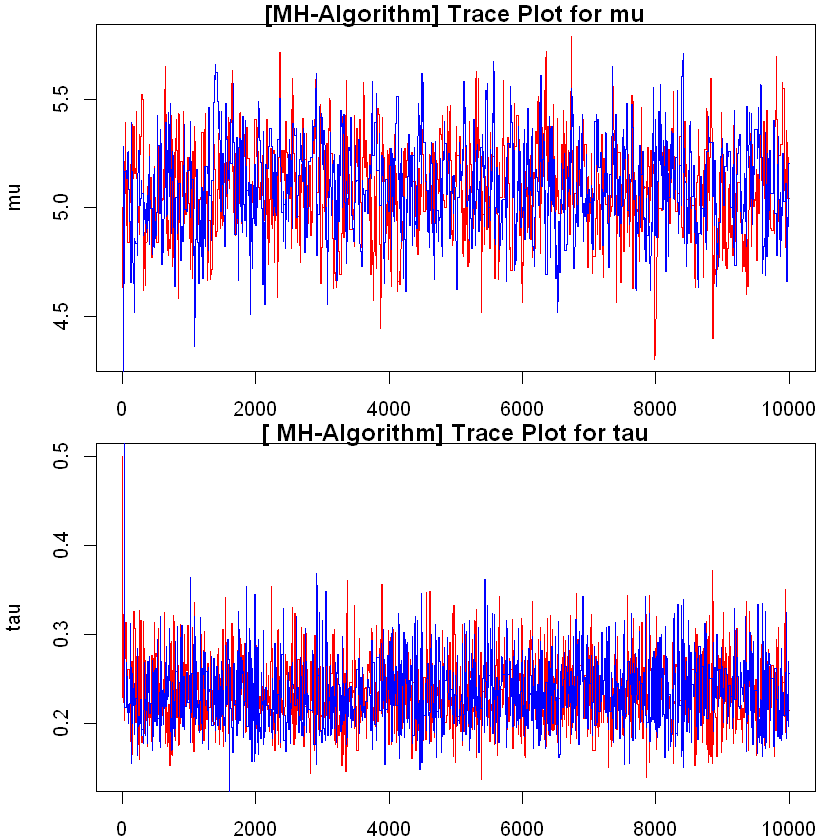

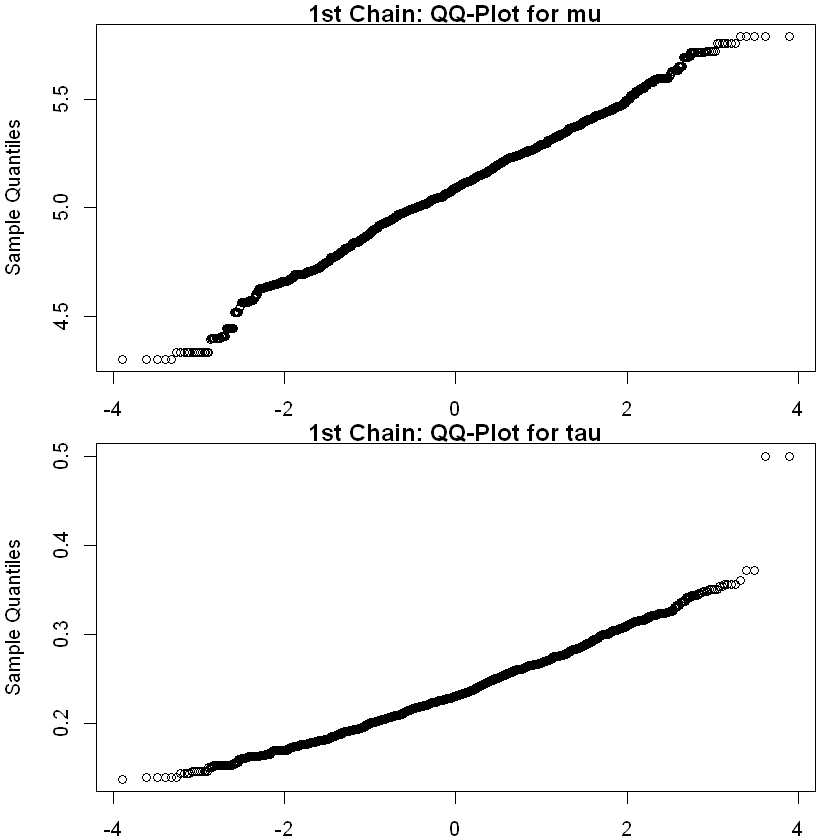

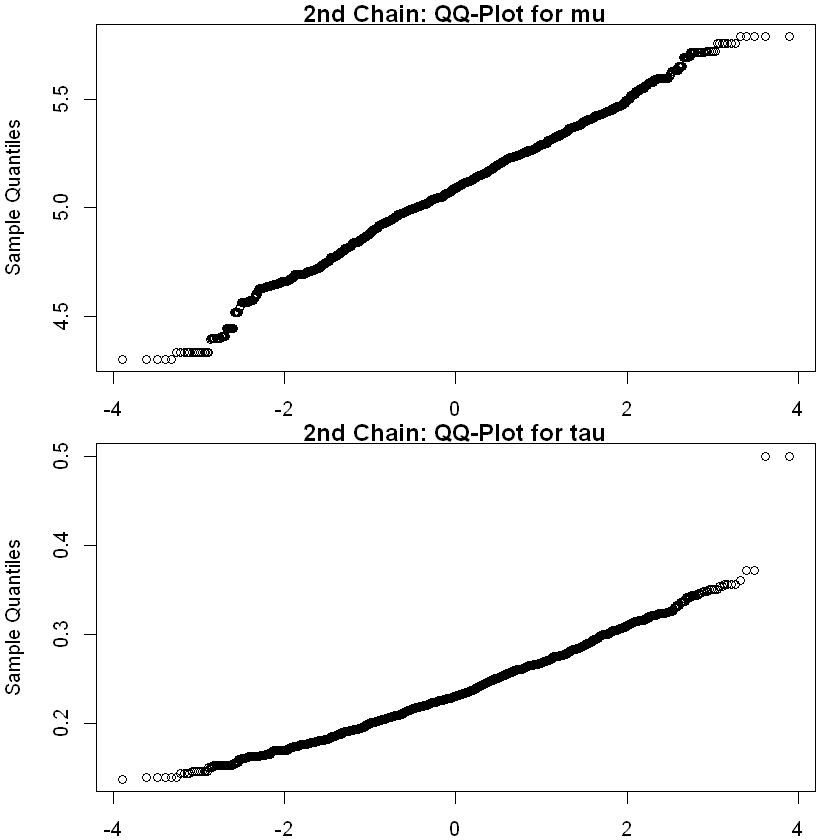

In [9]:
par(mfrow=c(2,1), mar=c(2,4,1,1))
plot(run1.mh[,1], type="l", xlab="iteration", ylab="mu", col="red", main="[MH-Algorithm] Trace Plot for mu")
lines(run2.mh[,1], col="blue")

plot(run1.mh[,2], type="l", xlab="iteration", ylab="tau", col="red", main="[ MH-Algorithm] Trace Plot for tau")
lines(run2.mh[,2], col="blue")

qqnorm(run1.mh[,1], main="1st Chain: QQ-Plot for mu")
qqnorm(run1.mh[,2], main="1st Chain: QQ-Plot for tau")
qqnorm(run1.mh[,1], main="2nd Chain: QQ-Plot for mu")
qqnorm(run1.mh[,2], main="2nd Chain: QQ-Plot for tau")

### Question 2c)
- Function to output estimated mean, a 90% Credible Interval and histogram plot of estimated distribution

[1] "The mean is:"
[1] 5.088475
[1] "The 90% Credible Interval is"
      5%      90% 
4.717057 5.346193 


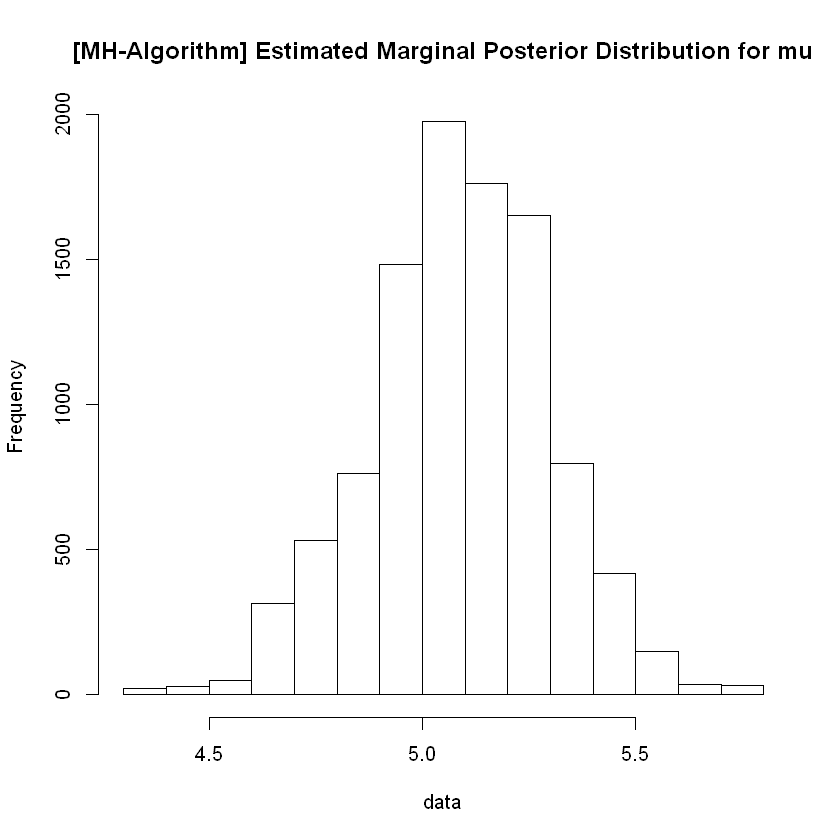

[1] "The mean is:"
[1] 0.2339575
[1] "The 90% Credible Interval is"
       5%       90% 
0.1789654 0.2779468 


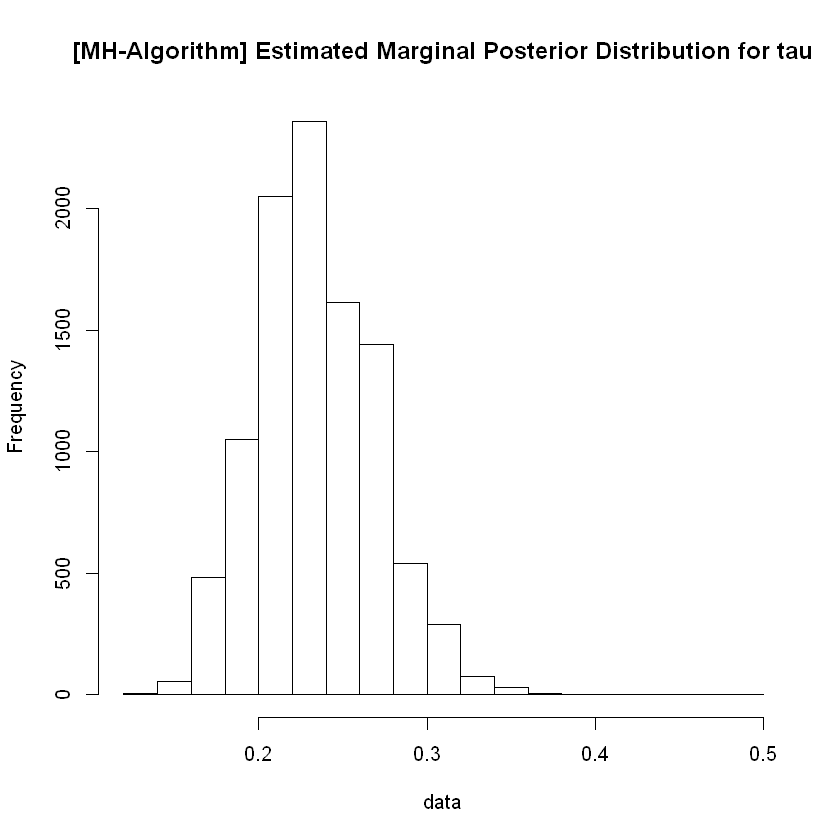

In [10]:
part.c(run1.mh[,1], "[MH-Algorithm] Estimated Marginal Posterior Distribution for mu")
part.c(run1.mh[,2], "[MH-Algorithm] Estimated Marginal Posterior Distribution for tau")